<a href="https://colab.research.google.com/github/MarconeRafael/Classificacao_de_Imagens_com_PyTorch/blob/main/Classifica%C3%A7%C3%A3o_de_Imagens_com_PyTorch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Imagens com PyTorch
* Importando dataset
* Pré-processamento e Visualização
* Criando um Modelo
* Treinando e Testando o modelo
* Visualização dos resultados




In [ ]:
import torch
import torchvision

# Definindo o Dispositivo

In [ ]:
torch.device('cuda')

device(type='cuda')

# Importando Dataset e Normalizando - MINIST

In [ ]:
from torchvision import transforms

transformacao = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5))
])

In [ ]:
from torch.nn.modules import transformer
dataset_treino = torchvision.datasets.MNIST('./dados', download=True, train=True, transform=transformacao)
dataset_teste  = torchvision.datasets.MNIST('./dados', download=True, train=False, transform=transformacao)

100%|██████████| 9912422/9912422 [00:00<00:00, 148320471.07it/s]

Extracting ./dados/MNIST/raw/train-images-idx3-ubyte.gz to ./dados/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 32088925.52it/s]


Extracting ./dados/MNIST/raw/train-labels-idx1-ubyte.gz to ./dados/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 37586979.12it/s]

Extracting ./dados/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dados/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21501725.47it/s]


Extracting ./dados/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dados/MNIST/raw



# Visualizando Dados - MNIST

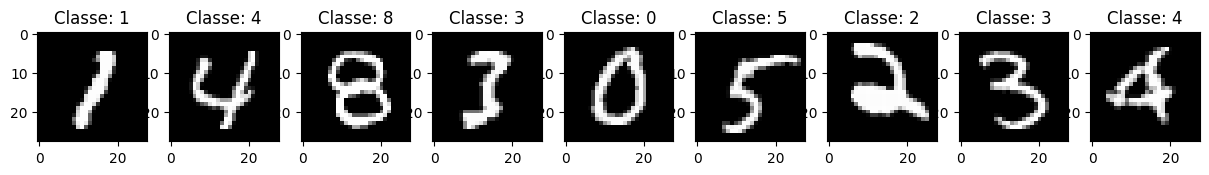

In [ ]:
import matplotlib.pyplot as plt
import random

fig, axs  = plt.subplots(nrows=1, ncols=9, figsize=(15, 4))

for ax in axs:
  random_idx = random.randint(0, len(dataset_treino.data))
  ax.imshow(dataset_treino.data[random_idx].numpy(), cmap='gray')
  ax.set_title(f'Classe: {dataset_treino.targets[random_idx]}', size=12)

# Criando Modelo

In [ ]:
import torch.nn.functional as F

class Modelo(torch.nn.Module):
  def __init__(self):
    super(Modelo, self).__init__()

    self.camada_entrada = torch.nn.Linear(28*28, 128)
    self.camada_h1      = torch.nn.Linear(128, 64)
    self.camada_h2      = torch.nn.Linear(64, 32)
    self.camada_saida   = torch.nn.Linear(32, 10)

  def forward(self, x):
    x = F.relu(self.camada_entrada(x))
    x = F.relu(self.camada_h1(x))
    x = F.relu(self.camada_h2(x))
    x = F.softmax(self.camada_saida(x))

    return x



In [ ]:
modelo = Modelo()
print(modelo)

Modelo(
  (camada_entrada): Linear(in_features=784, out_features=128, bias=True)
  (camada_h1): Linear(in_features=128, out_features=64, bias=True)
  (camada_h2): Linear(in_features=64, out_features=32, bias=True)
  (camada_saida): Linear(in_features=32, out_features=10, bias=True)
)


# Definindo DataLoader

In [ ]:
from torch.utils.data import DataLoader

dados_treino = DataLoader(dataset_treino, batch_size=128, shuffle=True)
dados_teste  = DataLoader(dataset_teste,  batch_size=128, shuffle=False)

# Definindo Função para Treinamento

In [ ]:
import numpy as np

loss_func  = torch.nn.CrossEntropyLoss()
otimizador = torch.optim.Adam(modelo.parameters())

def funcao_treinamento(epoch, batch_size):
  valor_loss = 0
  lista_loss = []
  lista_acc  = []

  for dados, labels in dados_treino:
    dados = dados.view(dados.shape[0], -1)

    otimizador.zero_grad()
    saida_modelo = modelo(dados)

    _, predicoes = torch.max(saida_modelo.data, 1)

    loss = loss_func(saida_modelo, labels)
    loss.backward()
    otimizador.step()

    acertos = (predicoes == labels).sum().item()
    acc     = acertos/batch_size

    lista_acc.append(acc)
    lista_loss.append(loss.item())

  else:
    print(f'Época {epoch} - Loss treino: {np.mean(lista_loss)} Acurácia: {np.mean(lista_acc)}')

In [ ]:
for epoch in range(10):
  funcao_treinamento(epoch, 128)

<ipython-input-12-063e58f877a5>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.camada_saida(x))


Época 0 - Loss treino: 1.682800005493896 Acurácia: 0.8014558901918977
Época 1 - Loss treino: 1.5618424214788083 Acurácia: 0.9039678837953091
Época 2 - Loss treino: 1.5456738899003213 Acurácia: 0.9182602611940298
Época 3 - Loss treino: 1.5334201405551642 Acurácia: 0.929804104477612
Época 4 - Loss treino: 1.525224332870451 Acurácia: 0.9371501865671642
Época 5 - Loss treino: 1.519157210646916 Acurácia: 0.9429137793176973
Época 6 - Loss treino: 1.5127532202551868 Acurácia: 0.9495102611940298
Época 7 - Loss treino: 1.5087743468884467 Acurácia: 0.9528418176972282
Época 8 - Loss treino: 1.5051707181849205 Acurácia: 0.9563899253731343
Época 9 - Loss treino: 1.5029066386761696 Acurácia: 0.959155117270789


# Testando Modelo

In [ ]:
acertos = 0

with torch.no_grad():
  lista_acertos = []
  for dados, labels in dados_teste:
    dados = dados.view(dados.shape[0], -1)

    saida_modelo = modelo(dados)
    _, predicoes = torch.max(saida_modelo.data, 1)
    acertos      = (predicoes == labels).sum().item()
    lista_acertos.append(acertos/128)

print(f'Acurácia Modelo: {100 * np.mean(lista_acertos)}%')

<ipython-input-12-063e58f877a5>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.camada_saida(x))


Acurácia Modelo: 94.14556962025317%


# Visualizando resultados

In [ ]:
def norm_saida_modelo(saida_modelo):
  return (saida_modelo - saida_modelo.min()) / (saida_modelo.max() - saida_modelo.min())

<ipython-input-12-063e58f877a5>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.camada_saida(x))


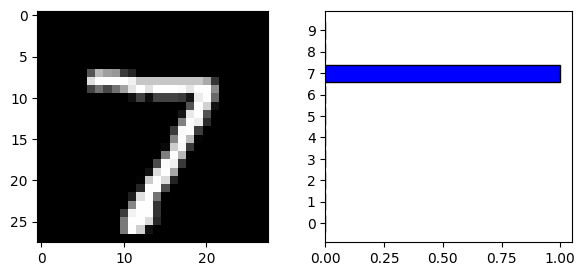

In [ ]:
imagem, labels = next(iter(dados_teste))

img = imagem[0].view(1, 784)
with torch.no_grad():
  saida_modelo = modelo(img)

saida_modelo = torch.exp(saida_modelo).numpy()[0]
fig, ax      = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
norm_saida   = norm_saida_modelo(saida_modelo)

ax[0].imshow(imagem[0].numpy()[0], cmap='gray')
ax[1].barh(range(10), norm_saida, ec='k', color='blue')
ax[1].set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]);
